# Predicting H1N1 Vaccine Uptake from Demographic and Behavioral Data

## Business Understanding

### Overview

Vaccination is one of the most effective tools in public health to combat the spread of infectious diseases. In addition to protecting individuals, vaccines contribute to herd immunity, reducing transmission within communities. While modern attention has focused on the COVID-19 pandemic, this project revisits the public health response to a prior global outbreak: the 2009 H1N1 (swine flu) pandemic.

The H1N1 virus emerged in early 2009 and led to an estimated 151,000 to 575,000 deaths worldwide during its first year. A vaccine was introduced in October 2009, and to assess public response, the U.S. launched the National 2009 H1N1 Flu Survey. This telephone survey gathered data on whether individuals received the H1N1  vaccines, alongside questions about their personal, economic, and demographic backgrounds, opinions on vaccine safety and effectiveness, and behaviors related to disease prevention. Despite the availability of the vaccine, not everyone chose to get vaccinated.

This leads to :

## The core business problem

How can public health organizations identify which individuals are likely or unlikely to receive the H1N1 vaccine, so they can design more targeted and effective vaccination campaigns?

By analyzing these survey responses,My aim is to uncover patterns in vaccination behavior and build a predictive model. Insights from this model could inform future vaccination campaigns, helping public health agencies better understand and address vaccine hesitancy.


## Stakeholders

The outcomes of this project are valuable to several key stakeholders:

* Public Health Agencies (CDC, WHO, local departments):
Use predictions and feature insights to tailor outreach and vaccine education campaigns.

* Healthcare Providers:
Identify at-risk populations for vaccine refusal and intervene through personalized guidance and education.

* Policy Makers:
Allocate resources more effectively by targeting communities or demographics less likely to get vaccinated.

* Non-Profit Organizations and NGOs:
Support data-driven public awareness campaigns and deliver educational programs where needed most.

* Data Scientists and Researchers:
Gain insights into behavioral modeling and its implications for health-related prediction tasks.

# Data Understanding

## Data Source:

This project uses data from the National 2009 H1N1 Flu Survey (NHFS), conducted in the United States following the emergence of the H1N1 (swine flu) pandemic. The survey was designed to assess vaccine uptake and gather individual-level data on demographics, opinions, and behaviors related to flu prevention and vaccination. It is a relevant and high-quality source for modeling public health behavior during a real-world pandemic scenario.

The dataset is divided into three files:

* training_set_features.csv – Includes responses from 26,707 individuals with 36 features related to demographic, behavioral, and opinion-based attributes.

* training_set_labels.csv – Contains binary indicators of whether the respondent received the H1N1 vaccine and the seasonal flu vaccine.

* test_set_features.csv – Contains data for 26,708 individuals with the same features as the training set; target labels are not provided.

The dataset includes:

* Demographic features (e.g., age group, sex, race, income, education):
Important for identifying population-level trends in vaccine uptake.

* Behavioral features (e.g., face mask use, hand washing, social behavior):
Reflect how seriously individuals took preventive measures, which may correlate with vaccination behavior.

* Opinion features (e.g., trust in vaccine effectiveness, perceived risk of illness):
Crucial for understanding personal beliefs and vaccine hesitancy.

These features are highly relevant for predicting H1N1 vaccine behavior, as they reflect key factors studied in public health research: health beliefs, socio-demographics, and behavioral intentions.



# Data Preparation

## Data Cleaning and Prepocessing



In [49]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [ ]:
# Loading the data of training_set_features test_set_features and training_set_labels.

features = pd.read_csv("training_set_features.csv")
features_test = pd.read_csv("test_set_features.csv")
labels= pd.read_csv("training_set_labels.csv")
features_train.head()
features_test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [20]:
# Drop the respondent_id in the above df
features = features_train.drop(columns=["respondent_id"])
features_test = features_test.drop(columns=["respondent_id"])
features_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


We are dropping the respondent_id since it is a unique identifier and it does not carry any predictive information about whether someone got the H1N1 vaccine. By including it could mislead the model into thinking that certain IDs are associated with certain outcomes — which is just random noise.

In [21]:
#Extract the target column (h1n1_vaccine)
target = labels["h1n1_vaccine"]

#Step 1: Split into training and validation sets ---
X_train, X_val, y_train, y_val = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

Splitting before preprocessing ensures there's no data leakage.

In [22]:
# Step 2: Identify column types
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [23]:
# Step 3: Impute missing values 

# Numerical
num_imputer = SimpleImputer(strategy="median")
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = num_imputer.transform(X_val[numerical_cols])
features_test[numerical_cols] = num_imputer.transform(features_test[numerical_cols])

# Categorical
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_val[categorical_cols] = cat_imputer.transform(X_val[categorical_cols])
features_test[categorical_cols] = cat_imputer.transform(features_test[categorical_cols]) 



I have used median to impute the numerical features since it is robust to outliers, gives a better central tendancy than mean for skewed data and it avoids data leakage.

In [25]:
# Step 4: One-hot encode categorical features ---
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols)
X_test_encoded = pd.get_dummies(features_test, columns=categorical_cols)


# Align all datasets to the same columns
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join="left", axis=1, fill_value=0)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join="left", axis=1, fill_value=0)

The pd.get_dummies() is used  to convert categorical columns into one-hot encoded columns. It turns each category into binary columns of 0 or 1.  

We align encoded features so all datasets have matching columns.

In [27]:
# Step 5: Scale numerical features
scaler = StandardScaler()
X_train_encoded[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_val_encoded[numerical_cols] = scaler.transform(X_val_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

# Shapes for verification
print("X_train_encoded:", X_train_encoded.shape)
print("X_val_encoded:", X_val_encoded.shape)
print("X_test_encoded:", X_test_encoded.shape)

X_train_encoded: (21365, 105)
X_val_encoded: (5342, 105)
X_test_encoded: (26708, 105)


I have used the StandardScaler inorder to standardize my numerical features to have a mean of 0 and a std.dev of 1. Scaling is applied after encoding.

# Exploratory Data Analysis
## Target Variable Distribution
It Check class balance 

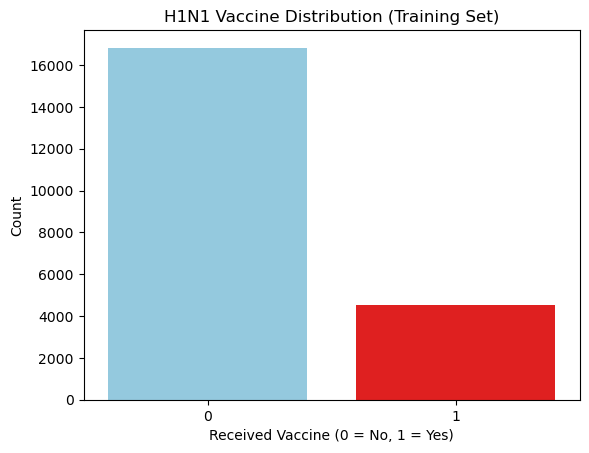

In [43]:
# Plotting
# Convert y_train to DataFrame
df = pd.DataFrame({'Vaccine': y_train})

# Use hue to control color by class
sns.countplot(data=df, x='Vaccine', hue='Vaccine', palette={0: "skyblue", 1: "red"}, legend=False)

plt.title("H1N1 Vaccine Distribution (Training Set)")
plt.xlabel("Received Vaccine (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The plot above shows label 0 which represents people who did not receive the H1N1 vaccine and label 1 represents those who did receive the vaccine.
A much larger number of people about 17,000 did not receive the vaccine and a smaller number of about 4,000 people did receive it.
This shows a class imbalance problem — most of the training data is from label 0 class . This favours the majority class 0.


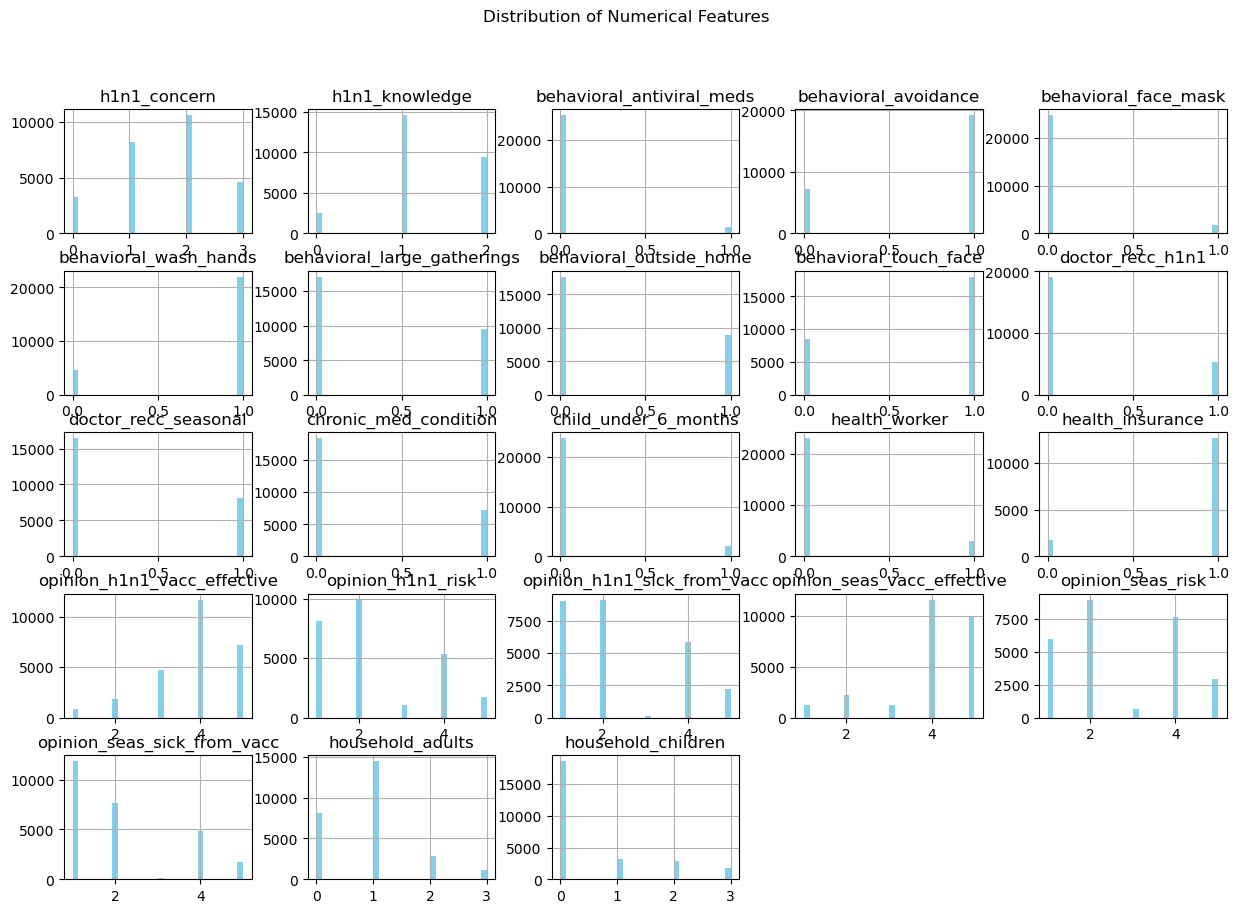

In [42]:
# Distribution of Numerical features
features[numerical_cols].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

This multi-plot shows the distribution of each numerical feature in your dataset.
Features like behavioral_avoidance, behavioral_face_mask, doctor_recc_h1n1, chronic_med_condition- they are binary (0 or 1), and are highly skewed — e.g., most people did not engage in those behaviors or meet those conditions


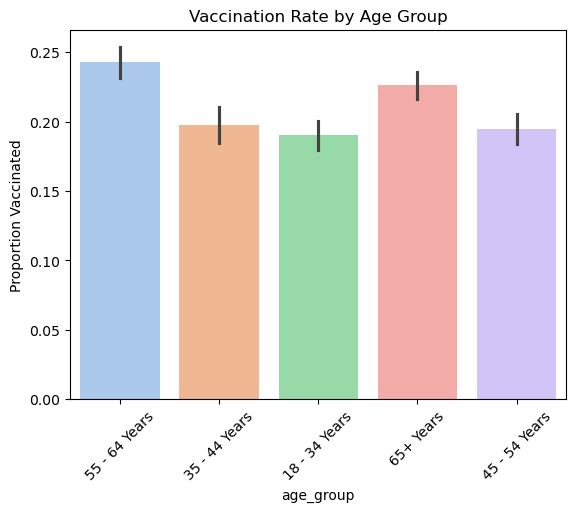

In [45]:
# Relationships between categorical features and target
# Plotting vaccination rate by age group
# Merge features and target temporarily for visualization
merged = pd.concat([features, target], axis=1)

# Barplot of H1N1 vaccine uptake by age group with color
sns.barplot(data=merged, x="age_group", y="h1n1_vaccine", hue="age_group", palette="pastel", legend=False)
plt.title("Vaccination Rate by Age Group")
plt.ylabel("Proportion Vaccinated")
plt.xticks(rotation=45)
plt.show()



The Barplot above shows 55–64 years has the highest vaccination rate, around 24–25%.

65+ years is next, with a vaccination rate around 22–23%.

18–34, 35–44, and 45–54 years have lower vaccination rates, around 19–20%.

The age groups 35–44, 45–54, and 18–34 show similar and lower uptake rates.

# Modelling 
## Baseline model - Logistic Regression 

I have selected Logistic regression as the baseline model due to it's interpretability and simplicity. It provides a good starting point to understand how well the preprocessed data can predict H1N1 vaccination uptake.

Accuracy: 0.8367652564582553
ROC AUC Score: 0.8287465091220947

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.68      0.44      0.54      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342



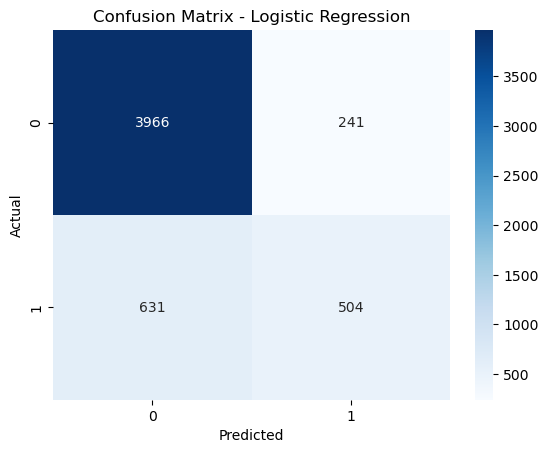

In [51]:
# Train baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_encoded, y_train)

# Predict on validation set
y_pred = baseline_model.predict(X_val_encoded)
y_prob = baseline_model.predict_proba(X_val_encoded)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Intepretation of the model 
The Accuracy is at 0.837 which means 83.7% of the total predictions were correct. This can be misleading due to class imbalance of class 0.

ROC AUC score is 0.829 which means the model is good at ranking vaccinated vs non-vaccinated casses. AUC tells us how the model separates the two classes 0.5 - No discrimination and 1.0 - perfect discrimination.

* Precision -  When it predicts not vaccinated(class 0), it's right 86% of the time. When it predicts vaccinated(class 1), it's right 68% of the time
* Recall - It finds 94% of all actual non-vaccinated (class 0)cases. It only finds 44% of all actual vaccinated(class1) cases.
* F1-Score - Strong performance on majority class(class 0).  Weaker performance on minority class (class 1).

The model perfomance better on class 0 (not vaccinated) — this is expected due to class imbalance. It's missing many true positives for class 1 (vaccinated) → low recall.


## Confusion Matrix interpretation

* 3966 True Negatives (TN): Model correctly predicted class 0 (not vaccinated).
* 241 False Positives (FP): Model incorrectly predicted vaccinated when not.
* 631 False Negatives (FN): Model missed actual vaccinated cases.
* 504 True Positives (TP): Model correctly predicted vaccinated.

The above matrix intrepretion means the following:

* High TN (3966) shows the model is good at identifying non-vaccinated individuals.
* Low TP (504) and high FN (631) suggest poor recall on the vaccinated class.
* The model is biased toward the majority class (0), which is expected due to class imbalance.